# Fysikklab TFY4106 og TFY4125 våren 2023.

Denne notebooken genererer en berg-og-dal-bane basert på koordinatene til åtte festepunkter med tildels 
tilfeldig valgte høyder. Baneformen $y(x)$ beregnes med funksjonen __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ består av ulike tredjegradspolynomer på deler av et intervall $[a,b]$, slik at $S$, $S' = dS/dx$ og $S'' = d^2S/dx^2$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.    

Dere skal deretter studere bevegelsen til ei lita kule som ruller på den genererte banen $y(x)$.
Dette blir temmelig enkelt ettersom kulas mekaniske energi (dvs summen av kinetisk og potensiell energi) er bevart 
når den ruller rent (dvs uten å gli). 

Skruehøydene genereres innenfor visse rammer som sørger for at 
<li> kula kommer seg gjennom hele banen, </li> 
<li> banen hele veien har så liten helningsvinkel at kula ikke glir, </li>
<li> banen faktisk er en berg-og-dal-bane, med både berg (bakketopp) og dal (bunnpunkt) underveis. </li>
    
Det holder å kjøre dette programmet en gang for å oppnå en tilfredsstillende bane.
Når dere har gjort dette, er det viktig at dere skriver ned koordinatene til festepunktene! 
Disse blir generert på nytt hver gang koden blir kjørt. Husk at dere skal sette opp banen fysisk på neste labøkt. Derfor er det viktig å notere nødvendig informasjon.
    

Vi begynner med å importere noen nyttige bibliotek:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene. 
Horisontal avstand mellom festepunktene er 200 mm.

In [2]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm 
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

In [3]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

Vi lager deretter en array med høydekoordinatene til festepunktene. 
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [4]:
#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 300
yfast[1] = yfast[0] - np.random.randint(40,60)
yfast[2] = yfast[1] - np.random.randint(70,90)
yfast[3] = yfast[2] + np.random.randint(-30,10)
yfast[4] = yfast[3] + np.random.randint(30,70)
yfast[5] = yfast[4] + np.random.randint(-20,20)
yfast[6] = yfast[5] - np.random.randint(40,80)
yfast[7] = yfast[6] + np.random.randint(-40,40)

Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [5]:
cs = CubicSpline(xfast,yfast,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [6]:
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

Nå kan vi plotte baneformen $y(x)$

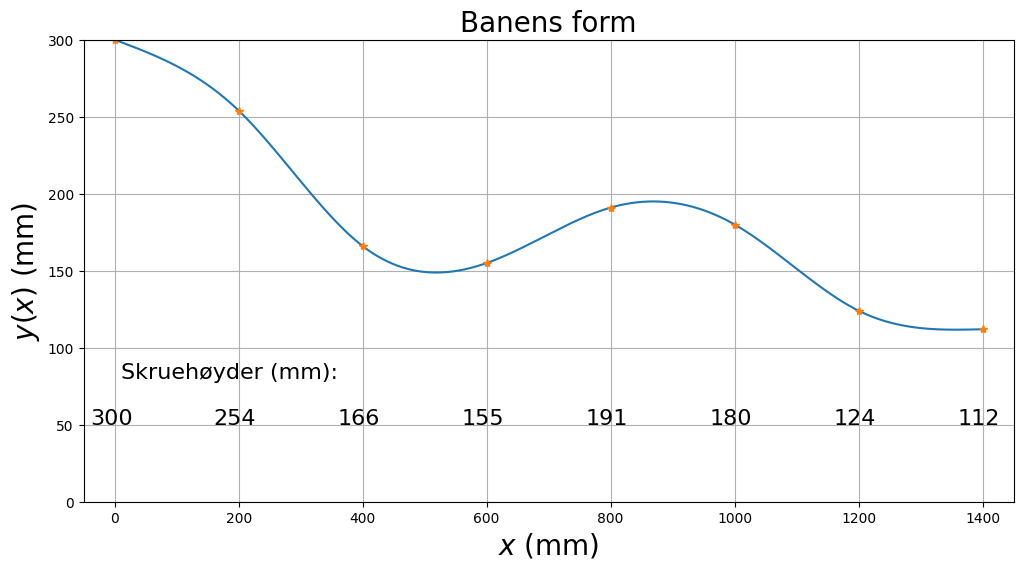

In [7]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehøyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()
#Ta bort # hvis du ønsker å lagre grafen som pdf og/eller png.
#baneform.savefig("baneform.pdf", bbox_inches='tight')
#baneform.savefig("baneform.png", bbox_inches='tight')

La oss til slutt foreta noen beregninger basert på banens form og skrive ut
noen størrelser, som en kontroll på at banen tilfredsstiller kriteriene som nevnes ovenfor. Du finner selv ut hva de beregnede størrelsene representerer.

In [8]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngår R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

Høyeste punkt etter 3.skrue (mm):  195
Laveste punkt etter 2.skrue (mm):  112
Starthelningsvinkel (grader): -8.6
Maksimal helningsvinkel (grader): 26.0
Minste krumningsradius (mm):  367
Festepunkthøyder (mm): [300. 254. 166. 155. 191. 180. 124. 112.]
